In [1]:
# Dataset
!gdown  1_JycQl_WP8jBlU24k9USI4MstAooXovq
!gdown 1lg3ELpSs162URKNF4lYSmA_W7Lifxtd0

Downloading...
From: https://drive.google.com/uc?id=1_JycQl_WP8jBlU24k9USI4MstAooXovq
To: /content/imdb_reviews.csv
100% 31.7M/31.7M [00:00<00:00, 210MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lg3ELpSs162URKNF4lYSmA_W7Lifxtd0
To: /content/test_reviews.csv
100% 30.5M/30.5M [00:00<00:00, 233MB/s]


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize


In [3]:
# Load data
train_data = pd.read_csv("/content/imdb_reviews.csv")
test_data = pd.read_csv("/content/test_reviews.csv")


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Reviews    25000 non-null  object
 1   Sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [5]:
train_data['value'] = np.where(train_data['Sentiment']== 'positive', 1, 0)
test_data['value'] = np.where(test_data['Sentiment']== 'positive', 1, 0)
train_data

,Reviews,Sentiment,value
0,<START this film was just brilliant casting lo...,positive,1
1,<START big hair big boobs bad music and a gian...,negative,0
2,<START this has to be one of the worst films o...,negative,0
3,<START the <UNK> <UNK> at storytelling the tra...,positive,1
4,<START worst mistake of my life br br i picked...,negative,0
...,...,...,...
24995,<START this is a racist movie but worthy of st...,positive,1
24996,<START bela lugosi plays a doctor who will do ...,negative,0
24997,<START in a far away galaxy is a planet called...,negative,0
24998,<START six degrees had me hooked i looked forw...,positive,1


In [6]:
x_train = train_data['Reviews']
y_train = train_data['value']
x_test = test_data['Reviews']
y_test = test_data['value']

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import re
import re
exclude_word = ['not']
stop = set(stopwords.words("english"))
filter_words = [word for word in stop if word not in exclude_word]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
import re
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

def remove_stopwords(text):
    filtered_words = " ".join([word.lower() for word in text.split() if word.lower() not in filter_words])
    filtered_words = striphtml(filtered_words)
    return filtered_words

In [9]:
# Apply the function to your text data
x_train = x_train.apply(remove_stopwords)
x_test =  x_test.apply(remove_stopwords)
x_train.head()

0     amazing actor director  father came scottish ...
1     hair big lots boobs  men wear cut  shirts sho...
2     working watch feeble excuse film must looked ...
3      storytelling traditional sort many years eve...
4     watched burn felt better anything else i've e...
Name: Reviews, dtype: object

In [ ]:
# # Apply TF-IDF vectorizer.
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)


In [11]:
import joblib
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [12]:

# Build Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Evaluate the model
from sklearn.metrics import f1_score
y_pred_lr = lr_model.predict(X_test)
f1_score(y_pred_lr, y_test)



0.8644162477056898

In [14]:
accuracy_lr = (y_test == y_pred_lr).mean()
accuracy_lr

0.86408

In [15]:
import joblib
joblib.dump(lr_model, "sentiment_analysis_model.pkl")


['sentiment_analysis_model.pkl']

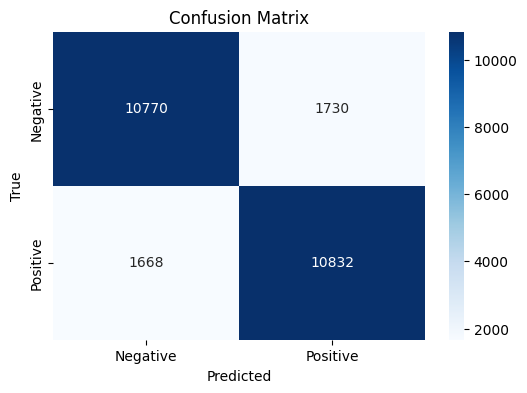

In [16]:
from matplotlib import pyplot as plt
import seaborn as sn
cm = confusion_matrix(y_test, y_pred_lr)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('lr_cm.png')
plt.show()

In [17]:
class_labels = ['negative', 'positive']

classification_report_lr = classification_report(y_test, y_pred_lr, target_names=class_labels)
print("Classification Report:")
print(classification_report_lr)

Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86     12500
    positive       0.86      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [18]:
# Predict sentiments using the trained model
input_text = [ "This movie is worst!",
              "Wow Amazing Eposide",
              "This movie was amazing! I loved every moment of it.",
              "The title doesn't appear on screen until 40 minutes into the movie."]
input_text_vectorized = vectorizer.transform(input_text)
predicted_sentiments = lr_model.predict(input_text_vectorized)

In [19]:
# Print the predictions
for text, sentiment in zip(input_text, predicted_sentiments):
    sentiment = 'positive' if sentiment == 1 else 'negative'

    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\n")

Text: This movie is worst!
Predicted Sentiment: negative

Text: Wow Amazing Eposide
Predicted Sentiment: positive

Text: This movie was amazing! I loved every moment of it.
Predicted Sentiment: positive

Text: The title doesn't appear on screen until 40 minutes into the movie.
Predicted Sentiment: negative



### *LSTM*

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense, Bidirectional, BatchNormalization, TextVectorization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

In [21]:
vectorize_layer = TextVectorization(
 max_tokens=1000,
 output_mode='int',
 output_sequence_length=120
 )

vectorize_layer.adapt(x_train)

In [22]:
X_train_vec = vectorize_layer(x_train)
X_test_vec = vectorize_layer(x_test)
X_train_vec

<tf.Tensor: shape=(25000, 120), dtype=int64, numpy=
array([[395, 173,  71, ...,   0,   0,   0],
       [931,  98, 650, ...,   0,   0,   0],
       [646,  33,   1, ...,   0,   0,   0],
       ...,
       [  1,  19,   1, ...,   0,   0,   0],
       [ 11,  54, 289, ...,   0,   0,   0],
       [161, 582,   1, ...,   0,   0,   0]])>

In [23]:
# Create the model
lstm_model = Sequential()
lstm_model.add(Embedding(1000, 64, input_length=120))
lstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.7))
lstm_model.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.1), recurrent_regularizer=l2(0.1))))
lstm_model.add(BatchNormalization())
lstm_model.add(Dense(16, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))


lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Define callbacks
early_stopping = EarlyStopping(patience=5, verbose = 2, restore_best_weights=True)
# checkpoint = ModelCheckpoint('lstm_model.h5', save_best_only=True)

# Train the model
history = lstm_model.fit(X_train_vec, y_train, epochs=30, batch_size=64, validation_split=0.2,
                         callbacks=[early_stopping])

Epoch 1/30
313/313 [==============================] - 40s 92ms/step - loss: 5.7554 - accuracy: 0.6898 - val_loss: 0.7161 - val_accuracy: 0.7578
Epoch 2/30
313/313 [==============================] - 12s 39ms/step - loss: 0.4816 - accuracy: 0.8073 - val_loss: 0.4927 - val_accuracy: 0.7948
Epoch 3/30
313/313 [==============================] - 8s 27ms/step - loss: 0.4535 - accuracy: 0.8176 - val_loss: 0.4529 - val_accuracy: 0.8164
Epoch 4/30
313/313 [==============================] - 9s 29ms/step - loss: 0.4403 - accuracy: 0.8226 - val_loss: 0.4615 - val_accuracy: 0.8130
Epoch 5/30
313/313 [==============================] - 9s 30ms/step - loss: 0.4264 - accuracy: 0.8290 - val_loss: 0.4479 - val_accuracy: 0.8126
Epoch 6/30
313/313 [==============================] - 8s 27ms/step - loss: 0.4113 - accuracy: 0.8340 - val_loss: 0.4268 - val_accuracy: 0.8262
Epoch 7/30
313/313 [==============================] - 9s 28ms/step - loss: 0.4032 - accuracy: 0.8418 - val_loss: 0.5436 - val_accuracy: 0.79

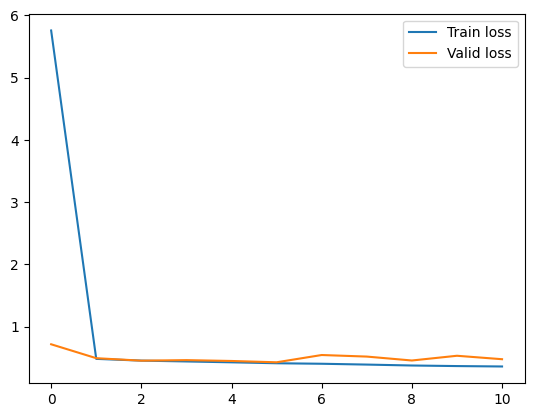

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Valid loss')
plt.legend()
plt.savefig('lstm_trian_val_loss.png')
plt.show()

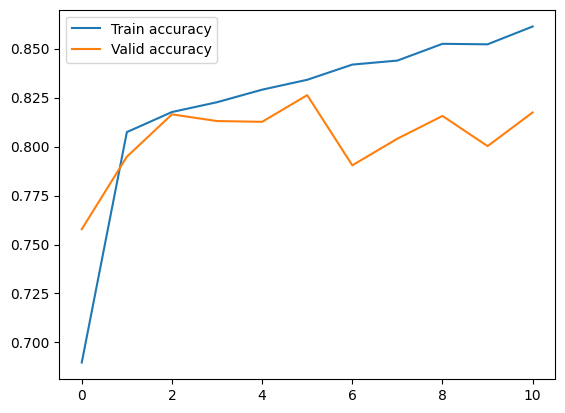

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Valid accuracy')
plt.legend()
plt.show()

In [27]:
_, accuracy_lstm = lstm_model.evaluate(X_test_vec, y_test)
accuracy_lstm

782/782 [==============================] - 8s 11ms/step - loss: 0.4249 - accuracy: 0.8218


0.8218399882316589

In [28]:
# Predict probabilities for the test set
y_pred_probs = lstm_model.predict(X_test_vec)

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.round(y_pred_probs).astype(int)


782/782 [==============================] - 9s 9ms/step


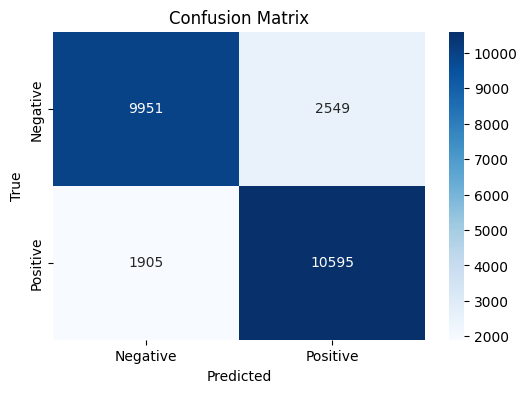

In [29]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('lstm_cm.png')
plt.show()


In [30]:

# Get the classification report
report = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     12500
           1       0.81      0.85      0.83     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



In [31]:
# Predict sentiments using the trained model
input_text = [ "This movie is worst!",
              "Wow Amazing Eposide",
              "This movie was amazing! I loved every moment of it.",
              "The title doesn't appear on screen until 40 minutes into the movie."]

In [32]:
vec = vectorize_layer(input_text)

In [33]:
pred = lstm_model.predict(vec)


1/1 [==============================] - 0s 28ms/step


In [34]:
# Print the predictions
for text, sentiment in zip(input_text, pred):

    if sentiment[0] > 0.5:
        print(f"Text: {text}\nPredicted Sentiment: Positive\n")
    else:
        print(f"Text: {text}\nPredicted Sentiment: Negative\n")



Text: This movie is worst!
Predicted Sentiment: Negative

Text: Wow Amazing Eposide
Predicted Sentiment: Positive

Text: This movie was amazing! I loved every moment of it.
Predicted Sentiment: Positive

Text: The title doesn't appear on screen until 40 minutes into the movie.
Predicted Sentiment: Negative



*Note:* Among the models above, LogisticRegression gives better results with accuracy of 86%.
So. logistic Regression model was dumbed